# Deep learning

# CentroGeo

## Jorge David Martínez Cervantes

## 25 de mayo del 2021

# 1 Optimization

Remember thar the optimality conditions in order to minimise a function $f : \mathbb{R}^2 \rightarrow \mathbb{R}$ are:

  1. $\triangledown f(x^*) = 0.$
  2. $H_f(x^*)$ is positive definite (PD).

## 1.1 Distance

In geospatial sciences the notion of distance is important. For now we are going to consider the square of distance functions for $\mathbb{R}^n$ defined as:

$$d^2_M(\textbf{x}-\textbf{y}) = (\textbf{x}-\textbf{y})^T M(\textbf{x}-\textbf{y})$$

where $M$ is a PD matrix. For a given set of points $\textbf{x}_i$, from $i = 1,2,...,K$ in $\mathbb{R}^3$, consider the cost function defined as:

$$D_M(\bar{\textbf{x}}) = \sum{d^2_M(\textbf{x}_i,\bar{\textbf{x}}})$$

  1. Find $\bar{\textbf{x}}$ that minimizes $D_M$.

  Utilizando la ecuación (86) de [[1](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)], y si suponemos que $\bar{\textbf{x}} = \textbf{y},$ obtenemos

  $$\frac{\partial D_M(\bar{\textbf{x}})}{\partial \bar{\textbf{x}}} = -2M \sum_{i=1}^{K}{\textbf{x}_i - \bar{\textbf{x}}},$$

  $$\frac{\partial D_M(\bar{\textbf{x}})}{\partial \bar{\textbf{x}}} = -2MK \sum_{i=1}^{K}{\textbf{x}_i + 2MK \bar{\textbf{x}}}$$

  $$\frac{\partial D_M(\bar{\textbf{x}})}{\partial \bar{\textbf{x}}} = 0$$

  $$0 = -2MK \sum_{i=1}^{K}{\textbf{x}_i + 2MK \bar{\textbf{x}}}$$

  $$-2MK \sum_{i=1}^{K}{\textbf{x}_i = 2MK \bar{\textbf{x}}}$$

  $$\sum_{i=1}^{K}{\textbf{x}_i = \bar{\textbf{x}}}$$
  
  $$\frac{1}{K}\sum_{i=1}^{K}{\textbf{x}_i = \bar{\textbf{x}}}$$

  1. Write a code to test your results from different $M$ matrices.
  1. Explain your results in terms of the eigen-values and eigen-vector of $M$.

Text(0, 0.5, 'Distancia')

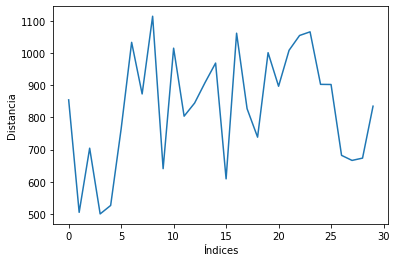

In [2]:
import numpy as np
%matplotlib inline

k = 10 # cantidad de elementos dados
n = 30

x = np.random.random((k,3))
x_prom = x.sum(axis=0)

lista_eivalues =[]
lista_eivector =[]
lista_distancia =[]

for i in range(n):
  M = np.random.rand(3,3)
  eivalues, eivectors = np.linalg.eig(M)
  lista_eivalues.append(eivalues)
  lista_eivector.append(eivectors)
  
  dist_aux = 0
  for i in range(k):
    dist_aux += np.dot(np.dot((x[i]-x_prom).T,M),(x[i]-x_prom))
  lista_distancia.append(dist_aux)

import matplotlib.pyplot as plt

plt.plot(lista_distancia)
plt.xlabel("Índices")
plt.ylabel("Distancia")

[ 0.76771126 -0.12931632  0.12539043]
[ 2.04766719  0.41315551 -0.18152643]
[ 2.15011606 -0.35525999 -0.24655947]


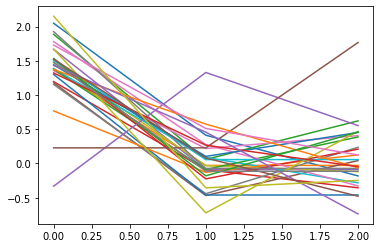

In [ ]:
print(lista_eivalues[11].real)
print(lista_eivalues[0].real)
print(lista_eivalues[28].real)

for i in range(len(lista_eivalues)-1):
  plt.plot(lista_eivalues[i].real)

## 1.2 Regression

Consider the problem of regression:

$$y = f(x) = \textbf{x}^T W \textbf{x} + \textbf{x}^T\textbf{w} + w,$$

where $y \in \mathbb{R}^N$, $\textbf{x} \in \mathbb{R}^N$, $W \in \mathbb{R}^{N \times N}$ is a simmetric PD matrix, $\textbf{w} \in \mathbb{R}^N$ and $w \in \mathbb{R}$. Given a set of observations {$\textbf{x}_i,y_i$}, from $i=1,2,...,M$:

  1. Find the optimal parameters $W$, $\textbf{w}$ and $w$ that minimize:

  $$E(\hat{\textbf{w}}) = \sum_{i=1}^{K} (y_i - (\textbf{x}_i^T W \textbf{x}_i + \textbf{x}_i^T \textbf{w} + w))^2,$$

  where $\hat{\textbf{w}}$ is a vector containing _the necessary values_ to build $f(\textbf{x}).$

  1. Write a code to simulate the problem.

### Solución

Usando la ecuación (72) de [[1](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)] ($\frac{\partial \textbf{a}^TX^T\textbf{a}}{\partial X} = \textbf{a}\textbf{a}^T$), obtenemos la derivada para $W$

$$\frac{\partial E(\bar{\textbf{x}})}{\partial W} = -2 \sum_{i=1}^K(y_i - (x_i^T W x_i + x_i^T \textbf{w} + w)) x_i x_i^T.$$

Igualando a cero y despejando, $W$, tenemos:

$$0 = -2 \sum_{i=1}^K(y_i - (x_i^T W x_i + x_i^T \textbf{w} + w)) x_i x_i^T;$$

$$0 = \sum_{i=1}^K y_i - \sum_{i=1}^K x_i^T W x_i - \sum_{i=1}^K x_i^T \textbf{w} - \sum_{i=1}^K w;$$

$$\sum_{i=1}^K x_i^T W x_i  = \sum_{i=1}^K y_i - \sum_{i=1}^K x_i^T \textbf{w} - \sum_{i=1}^K w.$$

Obtenemos la derivada para $\textbf{w}$

$$\frac{\partial E(\bar{\textbf{x}})}{\partial \textbf{w}} = -2 \sum_{i=1}^K(y_i - (x_i^T W x_i + x_i^T \textbf{w} + w)) x_i^T.$$

Igualando a cero y despejando, $\textbf{w}$, tenemos:

$$0 = -2 \sum_{i=1}^K(y_i - (x_i^T W x_i + x_i^T \textbf{w} + w)) x_i^T;$$

$$0 = \sum_{i=1}^K y_i - \sum_{i=1}^K x_i^T W x_i - \sum_{i=1}^K x_i^T \textbf{w} - \sum_{i=1}^K w$$

$$\sum_{i=1}^K x_i^T \textbf{w} = \sum_{i=1}^K y_i - \sum_{i=1}^K x_i^T W x_i - \sum_{i=1}^K w$$

Obtenemos la derivada para $w$:

$$\frac{\partial E(\bar{\textbf{x}})}{\partial \textbf{w}} = -2 \sum_{i=1}^K(y_i - (x_i^T W x_i + x_i^T \textbf{w} + w)).$$

Igualando a cero y despejando, $\textbf{w}$, tenemos:

$$0 = -2 \sum_{i=1}^K(y_i - (x_i^T W x_i + x_i^T \textbf{w} + w)).$$

$$0 = \sum_{i=1}^K{y_i} - \sum_{i=1}^K{x_i^T W x_i} - \sum_{i=1}^K{x_i^T \textbf{w}} - \sum_{i=1}^K{w}.$$

$$w = \sum_{i=1}^K{y_i} - \sum_{i=1}^K{x_i^T W x_i} - \sum_{i=1}^K{x_i^T \textbf{w}}.$$


# Referencias

[[1](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)] https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf